In [ ]:
from google.colab import files
x = files.upload()

Saving DataSet.zip to DataSet.zip


In [ ]:
! unzip DataSet.zip

Archive:  DataSet.zip
   creating: DataSet/
   creating: DataSet/human/
  inflating: DataSet/human/005a-beauty_shot.jpg  
  inflating: DataSet/human/040mm.jpg  
  inflating: DataSet/human/0QuU4gY-YdMfhwwRa.png  
 extracting: DataSet/human/10-tips-for-stunning-portrait-photography-9.jpg  
  inflating: DataSet/human/112ef6e5390f9ba16756bb5152448b56--washington-dc-norway.jpg  
  inflating: DataSet/human/1395_3x4.jpg  
  inflating: DataSet/human/1525891879-150444-oladimeji-odunsi-415606-unsplashjpg.jpg  
  inflating: DataSet/human/1525891879-188905-aatik-tasneem-138230-unsplashjpg.jpg  
  inflating: DataSet/human/1525891879-886386-sam-burriss-457746-unsplashjpg.jpg  
  inflating: DataSet/human/19-best-portrait-photography.jpg  
  inflating: DataSet/human/19selfportrait-ikeedeani-2000.jpg  
  inflating: DataSet/human/1jWx9suY2k3Ifq4B8A_vz9g.jpeg  
  inflating: DataSet/human/3-portrait-of-young-person-holding-campbell-addy.jpg  
  inflating: DataSet/human/568a8dc101dd74a9c66fb8a7948123dd7911

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = my_generator.flow_from_directory( './DataSet', target_size=(150, 150), batch_size=4, class_mode='binary')

Found 1038 images belonging to 2 classes.


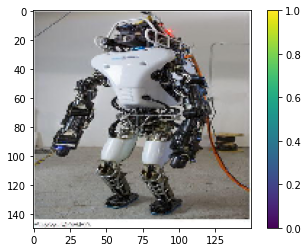

(150, 150, 3)
1.0


In [ ]:
import matplotlib.pyplot as plt
for my_batch in train_generator:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        # Gives one image and its corresponding label
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(images[i].shape)
        print(labels[i])
        break
    break

In [ ]:
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [ ]:
model1 = Sequential()
model1.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (150, 150, 3) ) )
model1.add( MaxPooling2D(4, 4) )
model1.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model1.add( MaxPooling2D(4, 4) )
model1.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model1.add( Flatten() )
model1.add( Dense( 10, activation = 'relu' ) )
model1.add( Dense( 1, activation = 'sigmoid' ) )
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 16)          4624      
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
model1.compile( optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = [ 'accuracy',tf.keras.metrics.Recall(), tf.keras.metrics.Precision() ], )
# Train using the training set and evaluate using the validation set
history1 = model1.fit( train_generator, epochs = 20, batch_size = 64 )

Epoch 1/20
203/260 [======================>.......] - ETA: 8s - loss: 0.6819 - accuracy: 0.5308 - recall: 0.4848 - precision: 0.5176

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


260/260 [==============================] - 39s 143ms/step - loss: 0.6606 - accuracy: 0.5684 - recall: 0.5698 - precision: 0.5654
Epoch 2/20
260/260 [==============================] - 36s 140ms/step - loss: 0.4294 - accuracy: 0.8247 - recall: 0.8391 - precision: 0.8139
Epoch 3/20
260/260 [==============================] - 37s 141ms/step - loss: 0.3632 - accuracy: 0.8555 - recall: 0.8488 - precision: 0.8588
Epoch 4/20
260/260 [==============================] - 37s 143ms/step - loss: 0.3185 - accuracy: 0.8661 - recall: 0.8643 - precision: 0.8660
Epoch 5/20
260/260 [==============================] - 37s 143ms/step - loss: 0.2854 - accuracy: 0.8834 - recall: 0.8798 - precision: 0.8850
Epoch 6/20
260/260 [==============================] - 37s 142ms/step - loss: 0.2416 - accuracy: 0.9046 - recall: 0.9050 - precision: 0.9033
Epoch 7/20
260/260 [==============================] - 37s 143ms/step - loss: 0.2231 - accuracy: 0.9123 - recall: 0.8973 - precision: 0.9242
Epoch 8/20
260/260 [===========

In [ ]:
model2 = Sequential()
model2.add( Conv2D( 32, ( 3, 3 ),padding="same", activation = 'relu', input_shape = (150, 150, 3) ) )
model2.add( MaxPooling2D(4, 4) )
model2.add( Conv2D( 16, ( 3, 3 ),padding="same", activation = 'relu' ) )
model2.add( MaxPooling2D(4, 4) )
model2.add( Conv2D( 8, ( 3, 3 ),padding="same", activation = 'relu' ) )
model2.add( Flatten() )
model2.add( Dense( 10, activation = 'relu' ) )
model2.add( Dense( 1, activation = 'sigmoid' ) )
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 37, 37, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 9, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 8)           1160      
                                                                 
 flatten_1 (Flatten)         (None, 648)              

In [ ]:

model2.compile( optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = [ 'accuracy',tf.keras.metrics.Recall(), tf.keras.metrics.Precision() ], )
# Train using the training set and evaluate using the validation set
history2 = model2.fit( train_generator, epochs = 20, batch_size = 64 )

Epoch 1/20
 22/260 [=>............................] - ETA: 23s - loss: 0.6950 - accuracy: 0.4318 - recall_1: 0.9487 - precision_1: 0.4353

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


260/260 [==============================] - 31s 115ms/step - loss: 0.6166 - accuracy: 0.6166 - recall_1: 0.8527 - precision_1: 0.5774
Epoch 2/20
260/260 [==============================] - 30s 114ms/step - loss: 0.4205 - accuracy: 0.8160 - recall_1: 0.8159 - precision_1: 0.8143
Epoch 3/20
260/260 [==============================] - 31s 117ms/step - loss: 0.3425 - accuracy: 0.8574 - recall_1: 0.8740 - precision_1: 0.8446
Epoch 4/20
260/260 [==============================] - 30s 115ms/step - loss: 0.3187 - accuracy: 0.8671 - recall_1: 0.8682 - precision_1: 0.8649
Epoch 5/20
260/260 [==============================] - 29s 112ms/step - loss: 0.2916 - accuracy: 0.8921 - recall_1: 0.8837 - precision_1: 0.8976
Epoch 6/20
260/260 [==============================] - 32s 123ms/step - loss: 0.2486 - accuracy: 0.8911 - recall_1: 0.8837 - precision_1: 0.8959
Epoch 7/20
260/260 [==============================] - 30s 112ms/step - loss: 0.2323 - accuracy: 0.9085 - recall_1: 0.9089 - precision_1: 0.9072
Epo

In [ ]:
model3 = Sequential()
model3.add( Conv2D( 16, ( 6, 6 ), activation = 'relu',padding="same" ,input_shape = (150, 150, 3) ) )
model3.add( MaxPooling2D(4, 4) )
model3.add( Conv2D( 8, ( 6, 6 ), activation = 'relu', padding="same" ) )
model3.add( Conv2D( 8, ( 2, 2 ), activation = 'relu', padding="same" ) )
model3.add( MaxPooling2D(4, 4) )
model3.add( Conv2D( 4, ( 2, 2 ), activation = 'relu',padding="same" ) )
model3.add( Flatten() )
model3.add( Dense( 10, activation = 'relu' ) )
model3.add( Dense( 1, activation = 'sigmoid' ) )
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      1744      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 37, 37, 8)         4616      
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 8)         264       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 9, 9, 8)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 9, 9, 4)          

In [ ]:
model3.compile( optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = [ 'accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision() ], )
# Train using the training set and evaluate using the validation set
history3 = model3.fit( train_generator, epochs = 20, batch_size = 64 )

Epoch 1/20
109/260 [===========>..................] - ETA: 23s - loss: 0.6696 - accuracy: 0.6193 - recall_2: 0.7578 - precision_2: 0.6014

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


260/260 [==============================] - 40s 149ms/step - loss: 0.6578 - accuracy: 0.6214 - recall_2: 0.6899 - precision_2: 0.6044
Epoch 2/20
260/260 [==============================] - 39s 149ms/step - loss: 0.6092 - accuracy: 0.6859 - recall_2: 0.7035 - precision_2: 0.6772
Epoch 3/20
260/260 [==============================] - 39s 149ms/step - loss: 0.5371 - accuracy: 0.7303 - recall_2: 0.7345 - precision_2: 0.7261
Epoch 4/20
260/260 [==============================] - 39s 150ms/step - loss: 0.4630 - accuracy: 0.7919 - recall_2: 0.7829 - precision_2: 0.7953
Epoch 5/20
260/260 [==============================] - 39s 150ms/step - loss: 0.4011 - accuracy: 0.8170 - recall_2: 0.8081 - precision_2: 0.8209
Epoch 6/20
260/260 [==============================] - 39s 152ms/step - loss: 0.3659 - accuracy: 0.8536 - recall_2: 0.8411 - precision_2: 0.8611
Epoch 7/20
260/260 [==============================] - 39s 150ms/step - loss: 0.3246 - accuracy: 0.8719 - recall_2: 0.8702 - precision_2: 0.8718
Epo

In [ ]:
model4 = Sequential()
model4.add( Conv2D( 32, ( 6, 6 ), activation = 'relu',padding="same", input_shape = (150, 150, 3) ) )
model4.add( MaxPooling2D(4, 4) )
model4.add( Conv2D(16, ( 6, 6 ), activation = 'relu',padding="same" ) )
model4.add( Conv2D( 16, ( 6, 6 ), activation = 'relu',padding="same" ) )
model4.add( MaxPooling2D(4, 4) )
model4.add( Conv2D( 8, ( 6, 6 ), activation = 'relu',padding="same" ) )
model4.add( Conv2D( 8, ( 6, 6 ), activation = 'relu',padding="same" ) )
model4.add( Conv2D( 4, ( 3, 3 ), activation = 'relu',padding="same" ) )
model4.add( Flatten() )
model4.add( Dense( 15, activation = 'relu' ) )
model4.add( Dense( 1, activation = 'sigmoid' ) )
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 150, 150, 32)      3488      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 37, 37, 16)        18448     
                                                                 
 conv2d_12 (Conv2D)          (None, 37, 37, 16)        9232      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 9, 9, 16)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 9, 9, 8)          

In [ ]:
model4.compile( optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = [ 'accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision() ], )
# Train using the training set and evaluate using the validation set
history4 = model4.fit( train_generator, epochs = 20, batch_size = 64 )

Epoch 1/20
 32/260 [==>...........................] - ETA: 47s - loss: 0.7038 - accuracy: 0.5625 - recall_3: 0.8630 - precision_3: 0.5780

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


260/260 [==============================] - 54s 202ms/step - loss: 0.6847 - accuracy: 0.5983 - recall_3: 0.6880 - precision_3: 0.5810
Epoch 2/20
260/260 [==============================] - 52s 201ms/step - loss: 0.6089 - accuracy: 0.7042 - recall_3: 0.7422 - precision_3: 0.6876
Epoch 3/20
260/260 [==============================] - 52s 202ms/step - loss: 0.5443 - accuracy: 0.7563 - recall_3: 0.7926 - precision_3: 0.7369
Epoch 4/20
260/260 [==============================] - 52s 202ms/step - loss: 0.4905 - accuracy: 0.7929 - recall_3: 0.8178 - precision_3: 0.7772
Epoch 5/20
260/260 [==============================] - 52s 201ms/step - loss: 0.4586 - accuracy: 0.7958 - recall_3: 0.8043 - precision_3: 0.7890
Epoch 6/20
260/260 [==============================] - 52s 200ms/step - loss: 0.3958 - accuracy: 0.8324 - recall_3: 0.8450 - precision_3: 0.8226
Epoch 7/20
260/260 [==============================] - 52s 201ms/step - loss: 0.3965 - accuracy: 0.8439 - recall_3: 0.8508 - precision_3: 0.8378
Epo

dict_keys(['loss', 'accuracy', 'recall', 'precision'])


Text(0, 0.5, 'Accuracy')

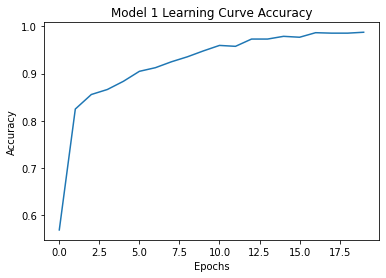

In [ ]:
print(history1.history.keys())
keyList1 = list(history1.history.keys())
plt.plot(history1.history[keyList1[1]])#show learning curve accuracy
plt.title("Model 1 Learning Curve Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")





Text(0, 0.5, 'Loss')

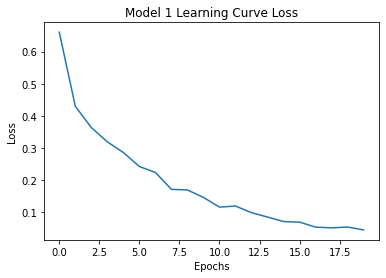

In [ ]:
plt.plot(history1.history[keyList1[0]])#show learning curve accuracy
plt.title("Model 1 Learning Curve Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Recall')

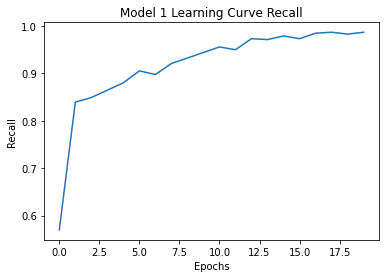

In [ ]:
plt.plot(history1.history[keyList1[2]]) #learning curve recall
plt.title("Model 1 Learning Curve Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")

Text(0, 0.5, 'Precision')

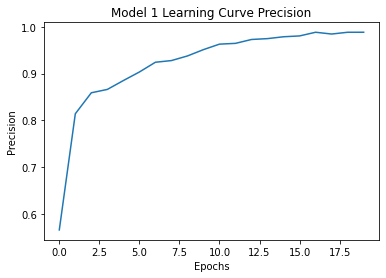

In [ ]:
plt.plot(history1.history[keyList1[3]]) #learning curve precision
plt.title("Model 1 Learning Curve Precision")
plt.xlabel("Epochs")
plt.ylabel("Precision")

dict_keys(['loss', 'accuracy', 'recall_1', 'precision_1'])


Text(0, 0.5, 'Accuracy')

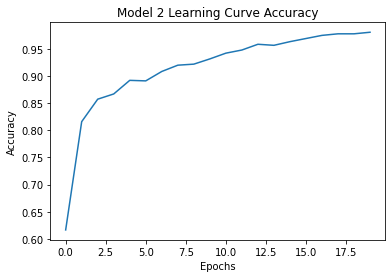

In [ ]:
print(history2.history.keys())
keyList2 = list(history2.history.keys())
plt.plot(history2.history[keyList2[1]])#show learning curve accuracy
plt.title("Model 2 Learning Curve Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

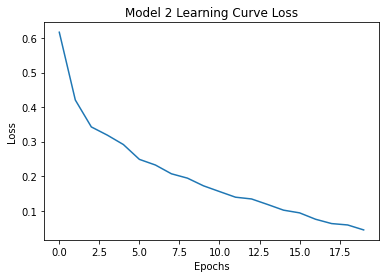

In [ ]:
plt.plot(history2.history[keyList2[0]])
plt.title("Model 2 Learning Curve Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Recall')

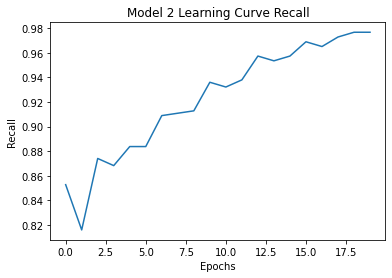

In [ ]:
plt.plot(history2.history[keyList2[2]])
plt.title("Model 2 Learning Curve Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")

Text(0, 0.5, 'Precision')

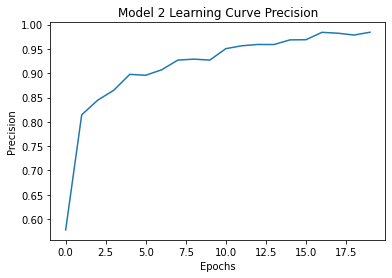

In [ ]:
plt.plot(history2.history[keyList2[3]])
plt.title("Model 2 Learning Curve Precision")
plt.xlabel("Epochs")
plt.ylabel("Precision")

dict_keys(['loss', 'accuracy', 'recall_2', 'precision_2'])


Text(0, 0.5, 'Accuracy')

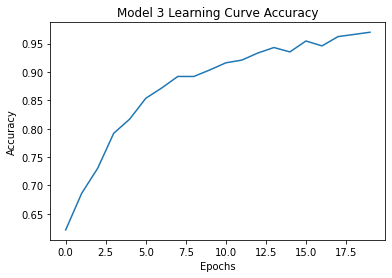

In [ ]:
print(history3.history.keys())
keyList3 = list(history3.history.keys())
plt.plot(history3.history[keyList3[1]])#show learning curve accuracy
plt.title("Model 3 Learning Curve Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

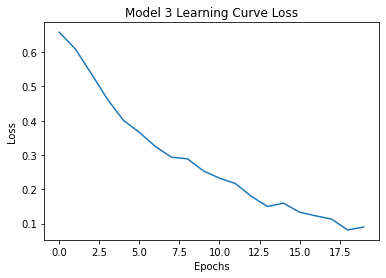

In [ ]:
plt.plot(history3.history[keyList3[0]])
plt.title("Model 3 Learning Curve Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Recall')

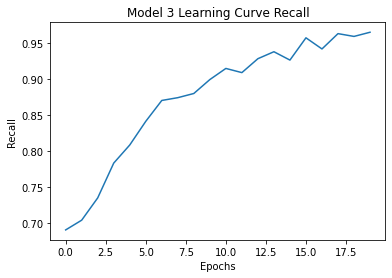

In [ ]:
plt.plot(history3.history[keyList3[2]])
plt.title("Model 3 Learning Curve Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")

Text(0, 0.5, 'Precision')

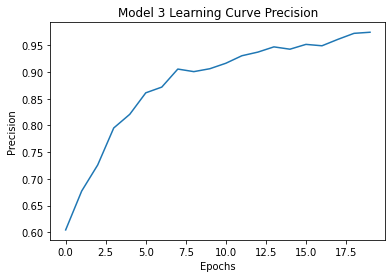

In [ ]:
plt.plot(history3.history[keyList3[3]])
plt.title("Model 3 Learning Curve Precision")
plt.xlabel("Epochs")
plt.ylabel("Precision")

dict_keys(['loss', 'accuracy', 'recall_3', 'precision_3'])


Text(0, 0.5, 'Accuracy')

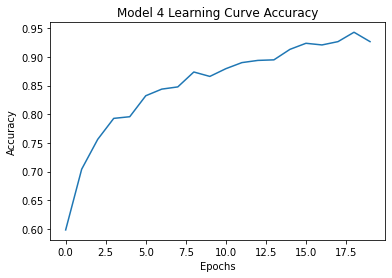

In [ ]:
print(history4.history.keys())
keyList4 = list(history4.history.keys())
plt.plot(history4.history[keyList4[1]])#show learning curve accuracy
plt.title("Model 4 Learning Curve Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")



Text(0, 0.5, 'Loss')

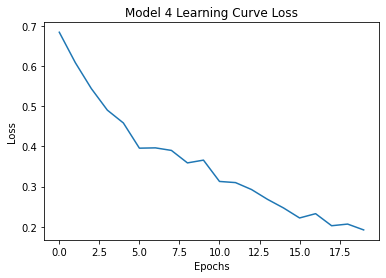

In [ ]:
plt.plot(history4.history[keyList4[0]])
plt.title("Model 4 Learning Curve Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Recall')

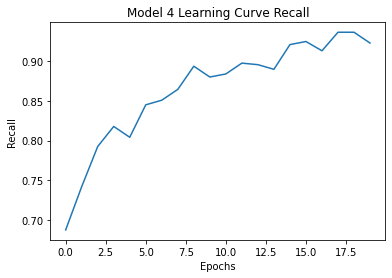

In [ ]:
plt.plot(history4.history[keyList4[2]])
plt.title("Model 4 Learning Curve Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")

Text(0, 0.5, 'Precision')

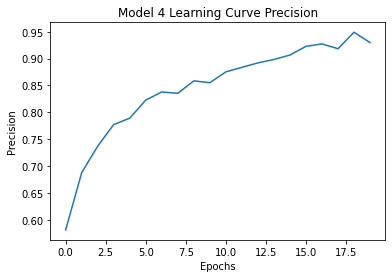

In [ ]:
plt.plot(history4.history[keyList4[3]])
plt.title("Model 4 Learning Curve Precision")
plt.xlabel("Epochs")
plt.ylabel("Precision")

In [ ]:
model5 = Sequential()
model5.add( Conv2D( 32, (2, 2 ), activation = 'relu', input_shape = (150, 150, 3) ) )
model5.add( MaxPooling2D(4 ,4) )
model5.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model5.add( MaxPooling2D(4, 4) )
model5.add( Conv2D( 16, ( 4, 4 ), activation = 'relu',padding="same"   ) )
model5.add( MaxPooling2D(4, 4) )
model5.add( Conv2D( 8, ( 5, 5 ), activation = 'relu',padding="same"  ) )
model5.add( Flatten() )
model5.add( Dense( 10, activation = 'relu' ) )
model5.add( Dense( 1, activation = 'sigmoid' ) )
model5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 149, 149, 32)      416       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 35, 35, 16)        4624      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 8, 8, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 8, 8, 16)          4112      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 2, 2, 16)       

In [ ]:
model5.compile( optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = [ 'accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision() ], )
# Train using the training set and evaluate using the validation set
history5 = model5.fit( train_generator, epochs = 20, batch_size = 64 )

Epoch 1/20
 55/260 [=====>........................] - ETA: 17s - loss: 0.6906 - accuracy: 0.5409 - recall_6: 1.0000 - precision_6: 0.5409

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


260/260 [==============================] - 29s 106ms/step - loss: 0.6250 - accuracy: 0.6705 - recall_6: 0.9050 - precision_6: 0.6145
Epoch 2/20
260/260 [==============================] - 29s 111ms/step - loss: 0.4387 - accuracy: 0.8150 - recall_6: 0.8081 - precision_6: 0.8176
Epoch 3/20
260/260 [==============================] - 28s 106ms/step - loss: 0.3834 - accuracy: 0.8410 - recall_6: 0.8314 - precision_6: 0.8462
Epoch 4/20
260/260 [==============================] - 28s 106ms/step - loss: 0.3268 - accuracy: 0.8719 - recall_6: 0.8508 - precision_6: 0.8869
Epoch 5/20
260/260 [==============================] - 28s 106ms/step - loss: 0.2906 - accuracy: 0.8854 - recall_6: 0.8760 - precision_6: 0.8915
Epoch 6/20
260/260 [==============================] - 28s 108ms/step - loss: 0.2777 - accuracy: 0.9008 - recall_6: 0.8973 - precision_6: 0.9025
Epoch 7/20
260/260 [==============================] - 28s 106ms/step - loss: 0.2401 - accuracy: 0.8950 - recall_6: 0.8837 - precision_6: 0.9030
Epo

dict_keys(['loss', 'accuracy', 'recall_6', 'precision_6'])


Text(0, 0.5, 'Accuracy')

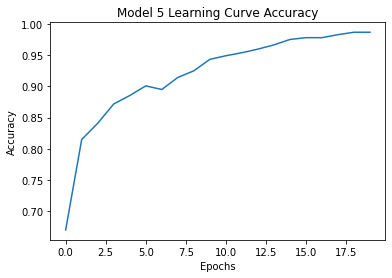

In [ ]:
print(history5.history.keys())
keyList5 = list(history5.history.keys())
plt.plot(history5.history[keyList5[1]])#show learning curve accuracy
plt.title("Model 5 Learning Curve Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

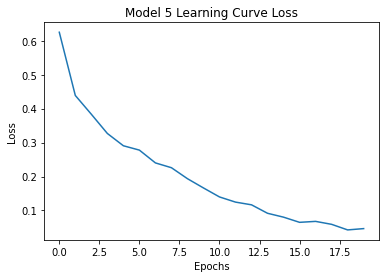

In [ ]:
plt.plot(history5.history[keyList5[0]])
plt.title("Model 5 Learning Curve Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Recall')

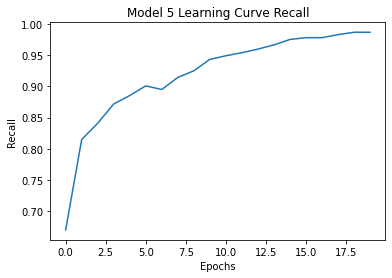

In [ ]:
plt.plot(history5.history[keyList5[1]])
plt.title("Model 5 Learning Curve Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")

Text(0, 0.5, 'Percision')

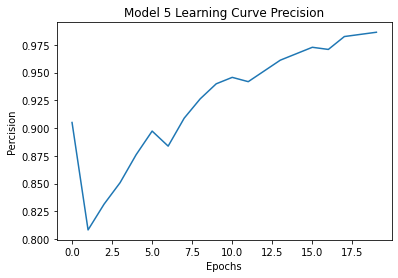

In [ ]:
plt.plot(history5.history[keyList5[2]])
plt.title("Model 5 Learning Curve Precision")
plt.xlabel("Epochs")
plt.ylabel("Percision")

In [ ]:
%%shell
jupyter nbconvert --to html /content/Phase_2.ipynb

[NbConvertApp] Converting notebook /content/Phase_2.ipynb to html
[NbConvertApp] Writing 873797 bytes to /content/Phase_2.html
